In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

path = "/media/sarah/storage/Data/Douglas Bakkum/sampledata/"
file_name = path+'footprint.mat'
mat_contents = sio.loadmat(file_name)

In [2]:
# Load electrode coordinates
n_elec = 206
x_coord = mat_contents['footprint'][0][0][6][0]
y_coord = mat_contents['footprint'][0][0][7][0]

# Load average traces
n_samples = 101
n_traces = mat_contents['footprint'][0][0][5][0]
tot_traces = mat_contents['footprint'][0][0][4]

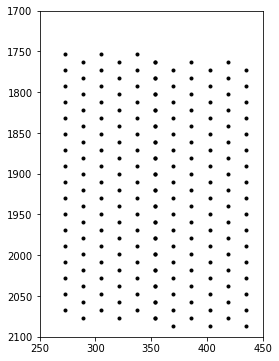

In [3]:
# Plot the rax x and y coordinates of the electrodes -> 17x11 electrodes
plt.figure(figsize=(4,6))

plt.plot(x_coord, y_coord, 'k.')
plt.ylim((2100, 1700))
plt.xlim((250, 450))

plt.show()

In [4]:
# Sorting the data

# Sorting in x-dir

sorted_xind = np.argsort(x_coord)

# Sorting in y-dir (and removing two outliers electrodes)

sorted_yind = np.zeros((n_elec-2))

for i in range(12):
    xx = y_coord[sorted_xind][17*i:17*(i+1)]
    sort_xx = np.argsort(xx) + int(17*i)
    sorted_yind[17*i:17*(i+1)] = sort_xx

sorted_yind = sorted_yind.astype(int)

# Sort all the data

sorted_xcoord = x_coord[sorted_xind][sorted_yind]
sorted_ycoord = y_coord[sorted_xind][sorted_yind]

sorted_ntraces = n_traces[sorted_xind][sorted_yind]
sorted_tottraces = tot_traces[:,sorted_xind][:,sorted_yind]

print 'Sorted x coordinates:'
print sorted_xcoord
print 'Sorted y coordinates:'
print sorted_ycoord

Sorted x coordinates:
[ 272.7  272.7  272.7  272.7  272.7  272.7  272.7  272.7  272.7  272.7
  272.7  272.7  272.7  272.7  272.7  272.7  272.7  288.9  288.9  288.9
  288.9  288.9  288.9  288.9  288.9  288.9  288.9  288.9  288.9  288.9
  288.9  288.9  288.9  288.9  305.1  305.1  305.1  305.1  305.1  305.1
  305.1  305.1  305.1  305.1  305.1  305.1  305.1  305.1  305.1  305.1
  305.1  321.3  321.3  321.3  321.3  321.3  321.3  321.3  321.3  321.3
  321.3  321.3  321.3  321.3  321.3  321.3  321.3  321.3  337.5  337.5
  337.5  337.5  337.5  337.5  337.5  337.5  337.5  337.5  337.5  337.5
  337.5  337.5  337.5  337.5  337.5  353.7  353.7  353.7  353.7  353.7
  353.7  353.7  353.7  353.7  353.7  353.7  353.7  353.7  353.7  353.7
  353.7  353.7  353.7  353.7  353.7  353.7  353.7  353.7  353.7  353.7
  353.7  353.7  353.7  353.7  353.7  353.7  353.7  353.7  353.7  369.9
  369.9  369.9  369.9  369.9  369.9  369.9  369.9  369.9  369.9  369.9
  369.9  369.9  369.9  369.9  369.9  369.9  386.1  386.

In [5]:
# Two times the same column (x=353.7)?

V = sorted_tottraces[45,:]        # potential at one time point

# Reshape the array to match the structure of the MEA

y_reshaped = sorted_ycoord.reshape((12,17)).T
x_reshaped = sorted_xcoord.reshape((12,17)).T
V_reshaped = V.reshape((12,17)).T

In [9]:
print 'The 12th supplementary column has' 
print 'the same x position as the 6th one:'
print x_reshaped[:,4:8]
print 'But the y coordinate does not correspond exactly, '
print 'in each column one electrode appears two times'
print y_reshaped[:,4:8]
print 'And the voltage is not the same'
print V_reshaped[:,4:8]

The 12th supplementary column has
the same x position as the 6th one:
[[ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]
 [ 337.5  353.7  353.7  369.9]]
But the y coordinate does not correspond exactly, 
in each column one electrode appears two times
[[ 1753.328  1763.123  1763.123  1772.917]
 [ 1772.917  1782.711  1782.711  1792.505]
 [ 1792.505  1802.299  1802.299  1812.093]
 [ 1812.093  1821.887  1821.887  1831.681]
 [ 1831.681  1841.476  1841.476  1851.27 ]
 [ 1851.27   1861.064  1861.064  1870.858]
 [ 1870.858  1900.24   1880.652  1890.446]
 [ 